# **Import Data**

In [ ]:
# # Upload file dari penyimpanan lokal
# from google.colab import files

# uploaded = files.upload()

# # Menampilkan nama file yang diunggah
# for filename in uploaded.keys():
#     print(f'Uploaded file: {filename}')

In [ ]:
# # Uploud file dari google drive
# from google.colab import drive

# drive.mount('/content/drive')

In [1]:
# Membaca dataset sesuai format
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

# Jika excel maka gunakan fungsi "read_excel", jika csv gunakan fungsi "read_csv"
df = pd.read_csv('/content/shipping.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,0.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,Female,44,1233,1
1,2,F,Flight,4,5,216,2,low,Male,59,3088,1
2,3,A,Flight,2,2,183,4,low,Male,48,3374,1
3,4,B,Flight,3,3,176,4,medium,Male,10,1177,1
4,5,C,Flight,2,2,184,3,medium,Female,46,2484,1


# **Preprocessing**

In [2]:
# Menampilkan inofrmasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  0.on.Time_Y.N        10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [3]:
# Mengetahui jumlah baris dan kolom dari dataset
print("Jumlah baris: {}\nJumlah kolom: {}".format(df.shape[0], df.shape[1]))

Jumlah baris: 10999
Jumlah kolom: 12


In [4]:
# Menghapus kolom "ID dan gender karena tidak ada korelasi nya"
shipping_df = df.copy()
shipping_df = shipping_df.drop(columns=['ID','Gender'])
shipping_df.tail()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,0.on.Time_Y.N
10994,A,Ship,4,1,252,5,medium,1,1538,1
10995,B,Ship,4,1,232,5,medium,6,1247,0
10996,C,Ship,5,4,242,5,low,4,1155,0
10997,F,Ship,5,2,223,6,medium,2,1210,0
10998,D,Ship,2,5,155,5,low,6,1639,0


In [5]:
shipping_df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,0.on.Time_Y.N
0,D,Flight,4,2,177,3,low,44,1233,1
1,F,Flight,4,5,216,2,low,59,3088,1
2,A,Flight,2,2,183,4,low,48,3374,1
3,B,Flight,3,3,176,4,medium,10,1177,1
4,C,Flight,2,2,184,3,medium,46,2484,1


In [6]:
# mengubah nama kolom 0.on.Time_Y.N
shipping_df.rename(columns={'0.on.Time_Y.N': 'Reached_on_Time_Y_N'}, inplace=True)
shipping_df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N
0,D,Flight,4,2,177,3,low,44,1233,1
1,F,Flight,4,5,216,2,low,59,3088,1
2,A,Flight,2,2,183,4,low,48,3374,1
3,B,Flight,3,3,176,4,medium,10,1177,1
4,C,Flight,2,2,184,3,medium,46,2484,1
...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,1,1538,1
10995,B,Ship,4,1,232,5,medium,6,1247,0
10996,C,Ship,5,4,242,5,low,4,1155,0
10997,F,Ship,5,2,223,6,medium,2,1210,0


In [7]:
# Melakukan pengecekan pada nilai yang hilang (missing value)
shipping_df.isnull().sum()

,0
Warehouse_block,0
Mode_of_Shipment,0
Customer_care_calls,0
Customer_rating,0
Cost_of_the_Product,0
Prior_purchases,0
Product_importance,0
Discount_offered,0
Weight_in_gms,0
Reached_on_Time_Y_N,0


In [8]:
# cek value dari kolom werehouse
shipping_df['Warehouse_block'].value_counts()

,count
Warehouse_block,
F,3666
D,1834
A,1833
B,1833
C,1833


In [9]:
# cek value dari kolom Shipment
shipping_df['Mode_of_Shipment'].value_counts()

,count
Mode_of_Shipment,
Ship,7462
Flight,1777
Road,1760


In [10]:
# cek value dari kolom Product Importance
shipping_df['Product_importance'].value_counts()

,count
Product_importance,
low,5297
medium,4754
high,948


Mengubah value kategorical menjadi numerical menggunakan LabelEncoder

In [11]:
label_encoder = LabelEncoder()

In [12]:
# mengubah value werehouse menjadi numerical
werehouse_encoded = label_encoder.fit_transform(shipping_df['Warehouse_block'])
shipping_df['Warehouse_block'] = werehouse_encoded

# mengubah value shipment menjadi numerical
shipment_encoded = label_encoder.fit_transform(shipping_df['Mode_of_Shipment'])
shipping_df['Mode_of_Shipment'] = shipment_encoded

# mengubah value product menjadi numerical
product_encoded = label_encoder.fit_transform(shipping_df['Product_importance'])
shipping_df['Product_importance'] = product_encoded

In [13]:
shipping_df.tail()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N
10994,0,2,4,1,252,5,2,1,1538,1
10995,1,2,4,1,232,5,2,6,1247,0
10996,2,2,5,4,242,5,1,4,1155,0
10997,4,2,5,2,223,6,2,2,1210,0
10998,3,2,2,5,155,5,1,6,1639,0


In [14]:
shipping_df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N
0,3,0,4,2,177,3,1,44,1233,1
1,4,0,4,5,216,2,1,59,3088,1
2,0,0,2,2,183,4,1,48,3374,1
3,1,0,3,3,176,4,2,10,1177,1
4,2,0,2,2,184,3,2,46,2484,1


In [15]:
# cek value dari kolom werehouse
shipping_df['Warehouse_block'].value_counts()

,count
Warehouse_block,
4,3666
3,1834
0,1833
1,1833
2,1833


Blok F -> 4,
Blok D -> 3,
Blok A -> 0,
Blok B -> 1,
Blok C -> 2

In [16]:
# cek value dari kolom Shipment
shipping_df['Mode_of_Shipment'].value_counts()

,count
Mode_of_Shipment,
2,7462
0,1777
1,1760


Ship -> 2,
Flight -> 0,
Road ->1

In [17]:
# cek value dari kolom Product Importance
shipping_df['Product_importance'].value_counts()

,count
Product_importance,
1,5297
2,4754
0,948


Low -> 1,
Medium -> 2,
High -> 0

In [18]:
# cek value dari kolom Product Importance
shipping_df['Reached_on_Time_Y_N'].value_counts()

,count
Reached_on_Time_Y_N,
1,6563
0,4436


1 -> Not Reached On Time,

0 -> Reached On Time

Univariate Analysis

<ipython-input-19-166a1789065c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Warehouse_block', palette = 'Set3', data = df)
<ipython-input-19-166a1789065c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Mode_of_Shipment', palette = 'Set3', data = df)
<ipython-input-19-166a1789065c>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Customer_rating',palette = 'Set3', data = df)
<ipython-input-19-166a1789065c>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0.

Text(0.5, 0, 'Product Importance')

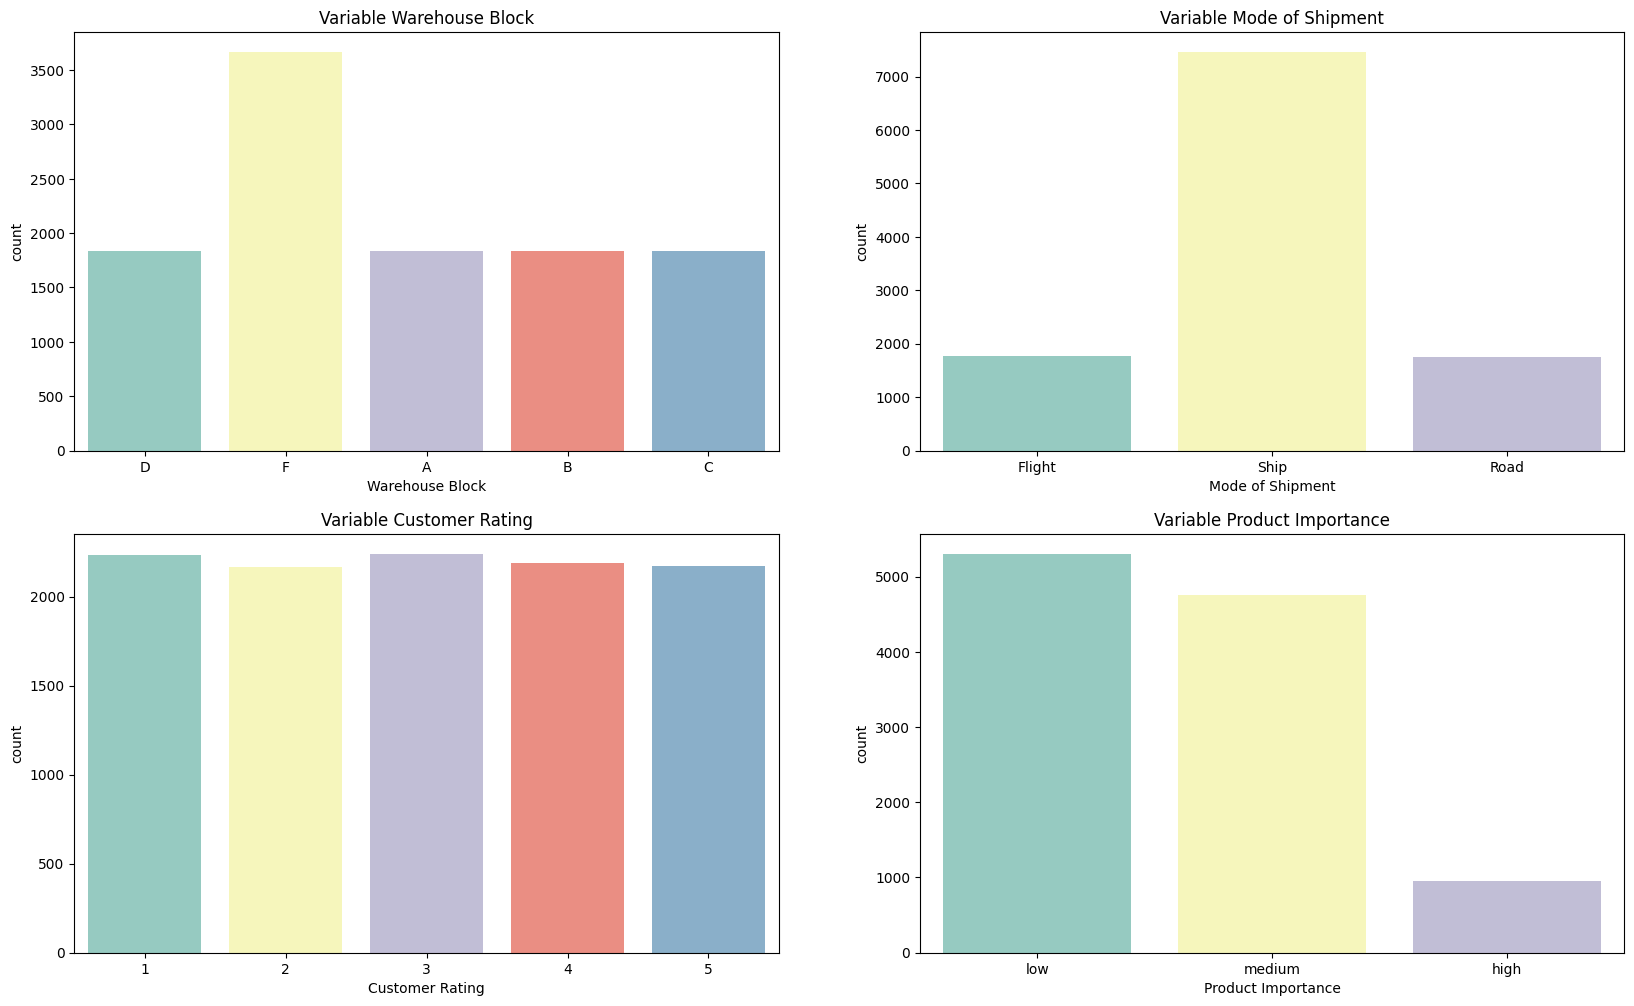

In [19]:
plt.figure(figsize=(20, 25))

# Plotting Count-Plot.
# 1st Plot!
plt.subplot(4,2,1)
plt.gca().set_title('Variable Warehouse Block')
sns.countplot(x = 'Warehouse_block', palette = 'Set3', data = df)
plt.gca().set_xlabel('Warehouse Block')

# 2nd Plot!
plt.subplot(4,2,2)
plt.gca().set_title('Variable Mode of Shipment')
sns.countplot(x = 'Mode_of_Shipment', palette = 'Set3', data = df)
plt.gca().set_xlabel('Mode of Shipment')

# 3rd Plot!
plt.subplot(4,2,3)
plt.gca().set_title('Variable Customer Rating')
sns.countplot(x = 'Customer_rating',palette = 'Set3', data = df)
plt.gca().set_xlabel('Customer Rating')

# 4th Plot!
plt.subplot(4,2,4)
plt.gca().set_title('Variable Product Importance')
sns.countplot(x = 'Product_importance', palette = 'Set3', data = df)
plt.gca().set_xlabel('Product Importance')


Informasi:

- Sebagian besar pengiriman produk menggunakan warehouse block F dengan mode pengiriman menggunakan kapal.
- Penilaian pelanggan dengan memberikan rentang angka 1 – 5 cenderung konstan, jumlah pelanggan yang memberikan penilaian sangat baik maupun sangat buruk tidak begitu signifikan.
- Sebagian besar kepentingan produk yang dikirimadalah low.

Text(0.5, 0, 'Discount Offered')

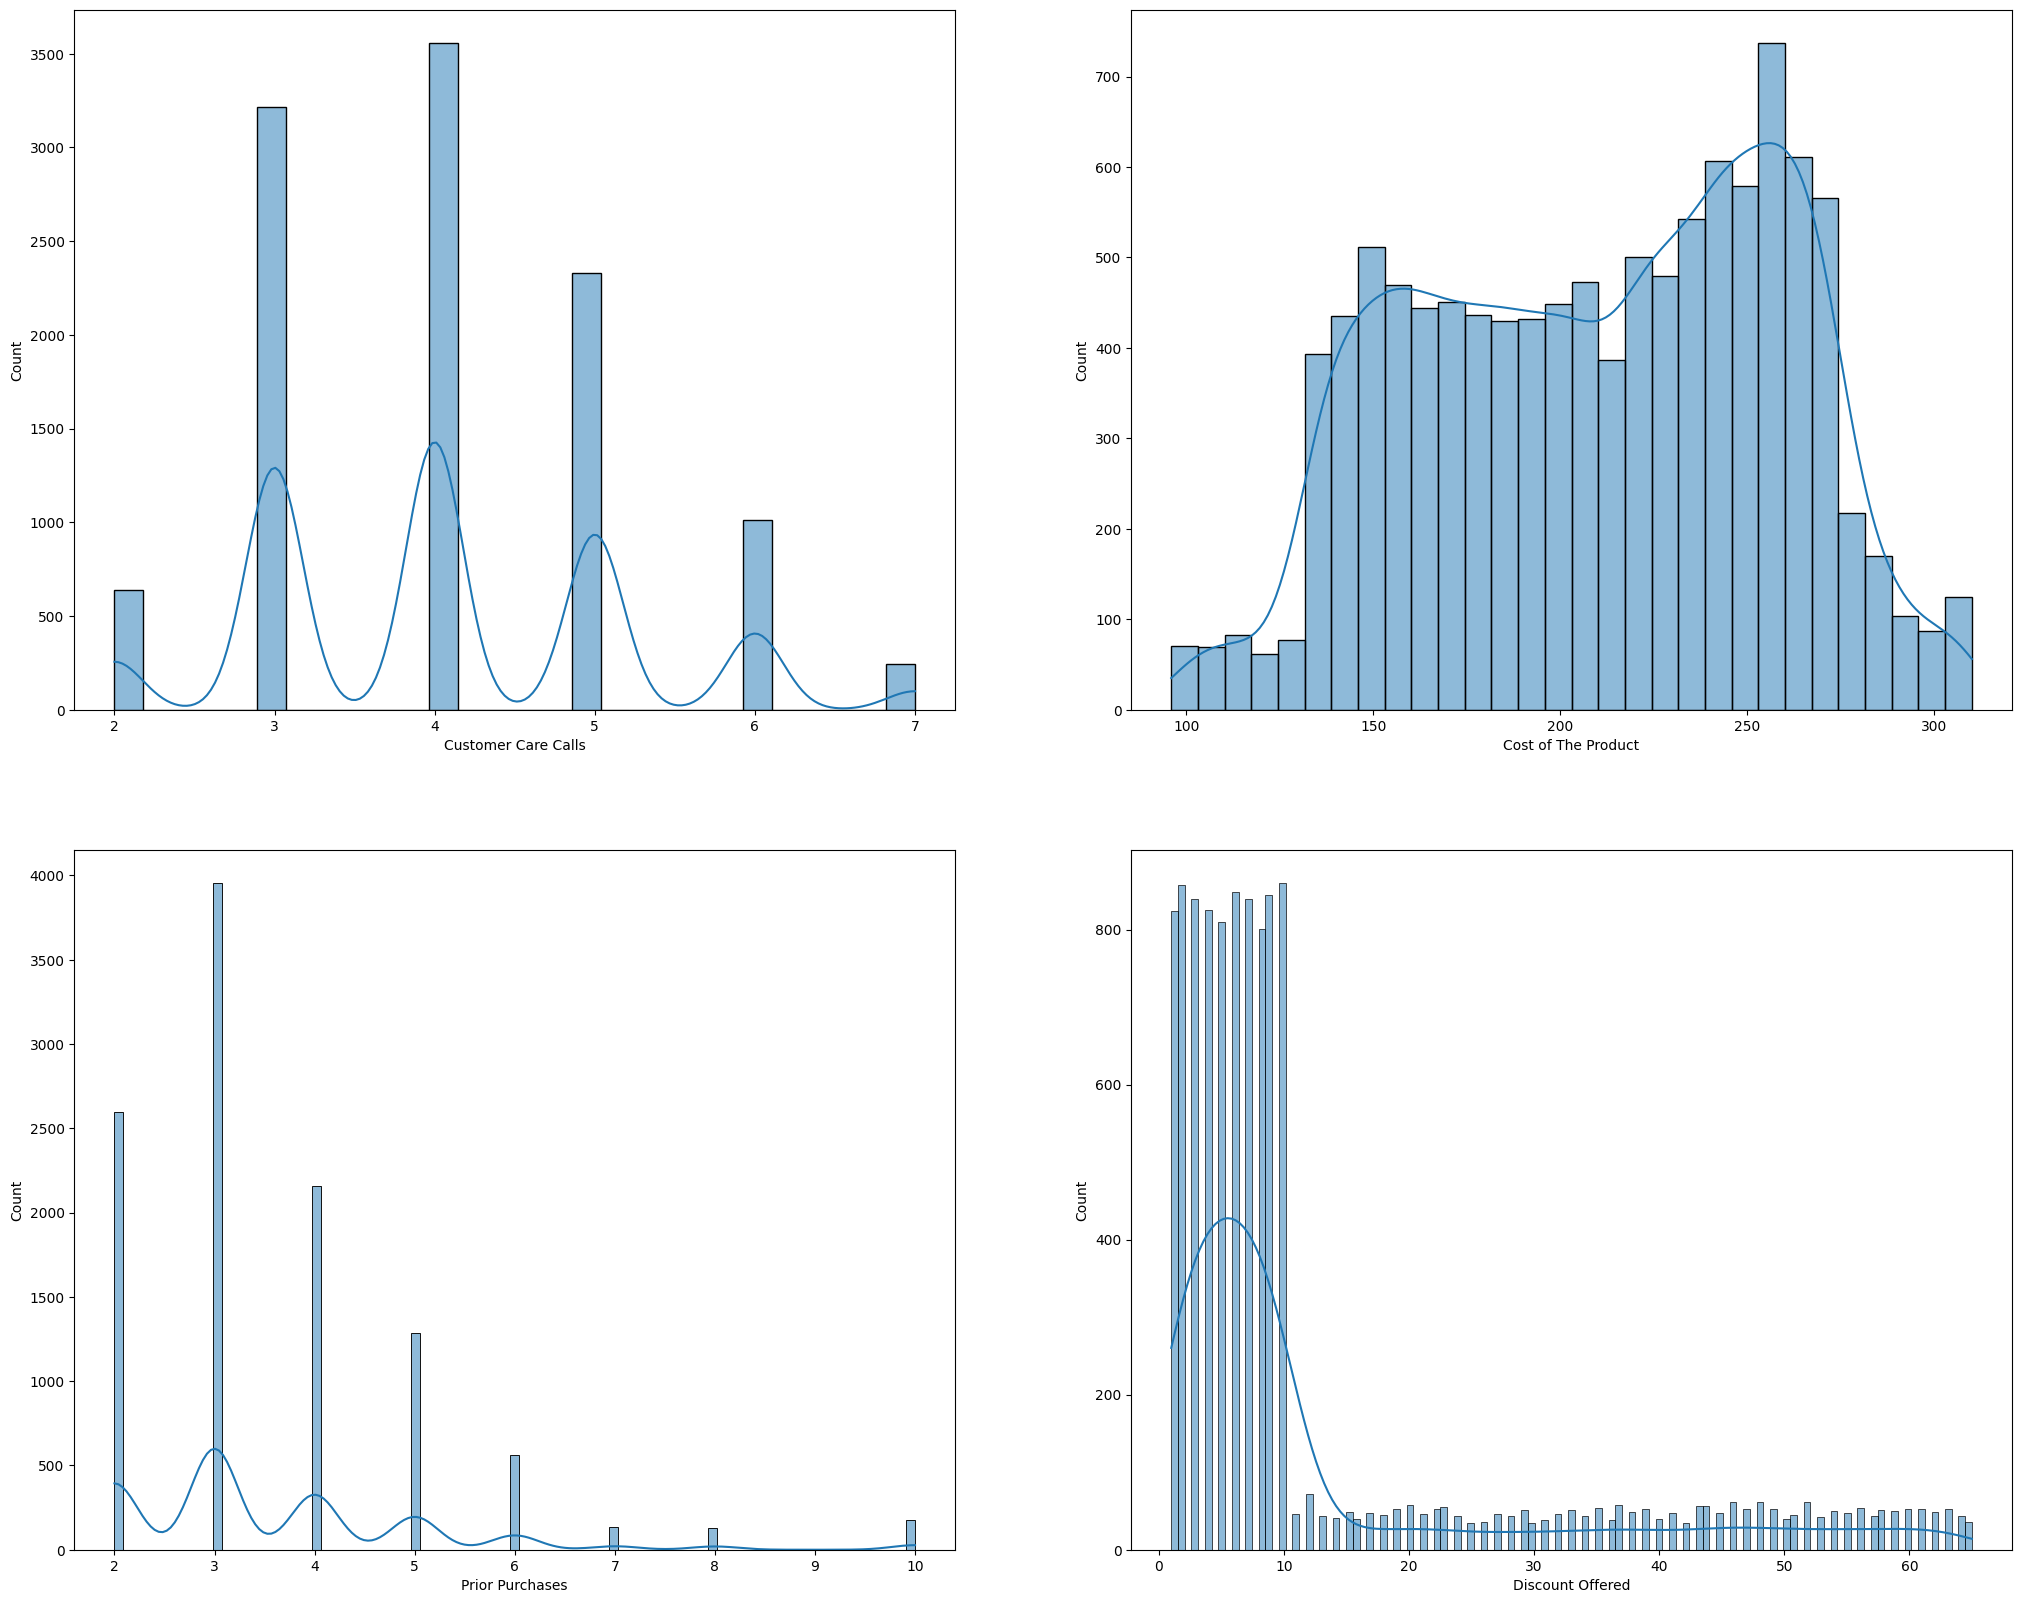

In [20]:
plt.figure(figsize = (25,20))

# Plotting Hist-Plots.
plt.subplot(2, 2, 1)
sns.histplot(data=df.Customer_care_calls, kde=True)
plt.gca().set_xlabel('Customer Care Calls')

plt.subplot(2, 2, 2)
sns.histplot(data=df.Cost_of_the_Product, kde=True)
plt.gca().set_xlabel('Cost of The Product')

plt.subplot(2, 2, 3)
sns.histplot(data=df.Prior_purchases, kde=True)
plt.gca().set_xlabel('Prior Purchases')

plt.subplot(2, 2, 4)
sns.histplot(data=df.Discount_offered, kde=True)
plt.gca().set_xlabel('Discount Offered')

Text(0.5, 0, 'Weight in gmsd')

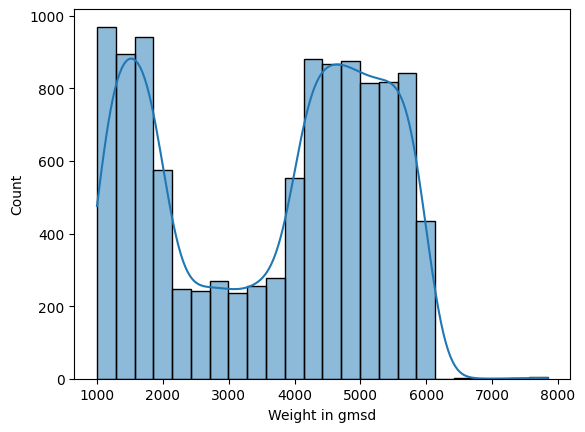

In [21]:
plt.subplot(1, 1, 1)
sns.histplot(data=df.Weight_in_gms, kde=True)
plt.gca().set_xlabel('Weight in gmsd')

Informasi:

- Berdasarkan histogram distribusi data, variabel dengan tipe numerik (integer) memiliki distribusi yang berbeda-beda.
- Variabel customer_care_calls hampir membentuk distribusi normal, dimana panggilan untuk melacak status pengiriman seringkali dilakukan sebanyak empat kali.
- Distribusi harga produk cenderung bervariasi, dengan kecenderungan normal.
- Pelanggan yang membeli produk e-commerce sebelumnya, sebagian besar dari mereka pernah membeli produk 2 hingga 5 kali.
- Diskon pada produk yang dibeli pelanggan lebih banyak berada pada rentang presentase 0-10 persen.
- Berat barang yang dikirimkan cenderung bervariasi dari 1 hingga 7 kg.

Jumlah nilai Not Reached On Time: 6563
Jumlah nilai Reached On Time: 4436
Persentase nilai Not Reached On Time: 59.66906082371125 %
Persentase nilai Reached On Time: 40.33093917628875 %


<ipython-input-22-27fa6427319e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=shipping_df.Reached_on_Time_Y_N, palette='Set3')


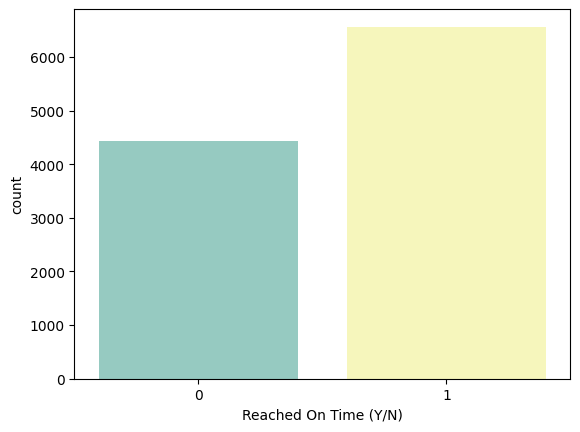

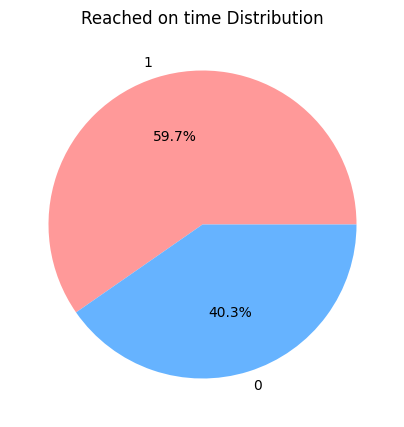

In [22]:
# Menghitung jumlah masing-masing nilai (1 dan 0)
counts = shipping_df['Reached_on_Time_Y_N'].value_counts()

# Menghitung persentase masing-masing nilai (1 dan 0)
percentages = shipping_df['Reached_on_Time_Y_N'].value_counts(normalize=True) * 100

# Menampilkan hasil
print("Jumlah nilai Not Reached On Time:", counts[1])
print("Jumlah nilai Reached On Time:", counts[0])
print("Persentase nilai Not Reached On Time:", percentages[1], "%")
print("Persentase nilai Reached On Time:", percentages[0], "%")

sns.countplot(x=shipping_df.Reached_on_Time_Y_N, palette='Set3')
plt.gca().set_xlabel('Reached On Time (Y/N)')

# Pie Chart
ontime_counts = shipping_df['Reached_on_Time_Y_N'].value_counts()
plt.figure(figsize = (5,5))
plt.pie(ontime_counts, labels=ontime_counts.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('Reached on time Distribution')
plt.show()


1 -> Not Reached On Time,

0 -> Reached On Time

In [23]:
# Menampilkan statistik deskriptif dari data
shipping_df.describe()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,2.333394,1.516865,4.054459,2.990545,210.196836,3.567597,1.346031,13.373216,3634.016729,0.596691
std,1.490726,0.756894,1.141490,1.413603,48.063272,1.522860,0.631434,16.205527,1635.377251,0.490584
min,0.000000,0.000000,2.000000,1.000000,96.000000,2.000000,0.000000,1.000000,1001.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,169.000000,3.000000,1.000000,4.000000,1839.500000,0.000000
50%,3.000000,2.000000,4.000000,3.000000,214.000000,3.000000,1.000000,7.000000,4149.000000,1.000000
75%,4.000000,2.000000,5.000000,4.000000,251.000000,4.000000,2.000000,10.000000,5050.000000,1.000000
max,4.000000,2.000000,7.000000,5.000000,310.000000,10.000000,2.000000,65.000000,7846.000000,1.000000


In [24]:
shipping_df.value_counts()

Warehouse_block  Mode_of_Shipment  Customer_care_calls  Customer_rating  Cost_of_the_Product  Prior_purchases  Product_importance  Discount_offered  Weight_in_gms  Reached_on_Time_Y_N
0                0                 2                    1                155                  2                1                   2                 5661           1                      1
4                0                 2                    2                155                  3                1                   1                 5154           0                      1
3                2                 7                    5                269                  4                2                   9                 1835           0                      1
                                                                         282                  5                1                   8                 1091           1                      1
                                                                         284                  4                2                   8                 1148           1                      1
                                                                                                                                                                                          ..
2                0                 2                    1                173                  2                0                   1                 4135           1                      1
                                                        2                184                  3                2                   46                2484           1                      1
                                                                         242                  3                0                   9                 4717           0                      1
                                                                         264                  3                2                   1                 4518           0                      1
4                2                 7                    5                306                  4                2                   2                 1281           0                      1
Name: count, Length: 10999, dtype: int64

In [25]:
shipping_df.isnull().sum()

,0
Warehouse_block,0
Mode_of_Shipment,0
Customer_care_calls,0
Customer_rating,0
Cost_of_the_Product,0
Prior_purchases,0
Product_importance,0
Discount_offered,0
Weight_in_gms,0
Reached_on_Time_Y_N,0


In [26]:
# membuat variabel baru untuk meletakkan fungsi
corr = shipping_df.corr()

<Axes: >

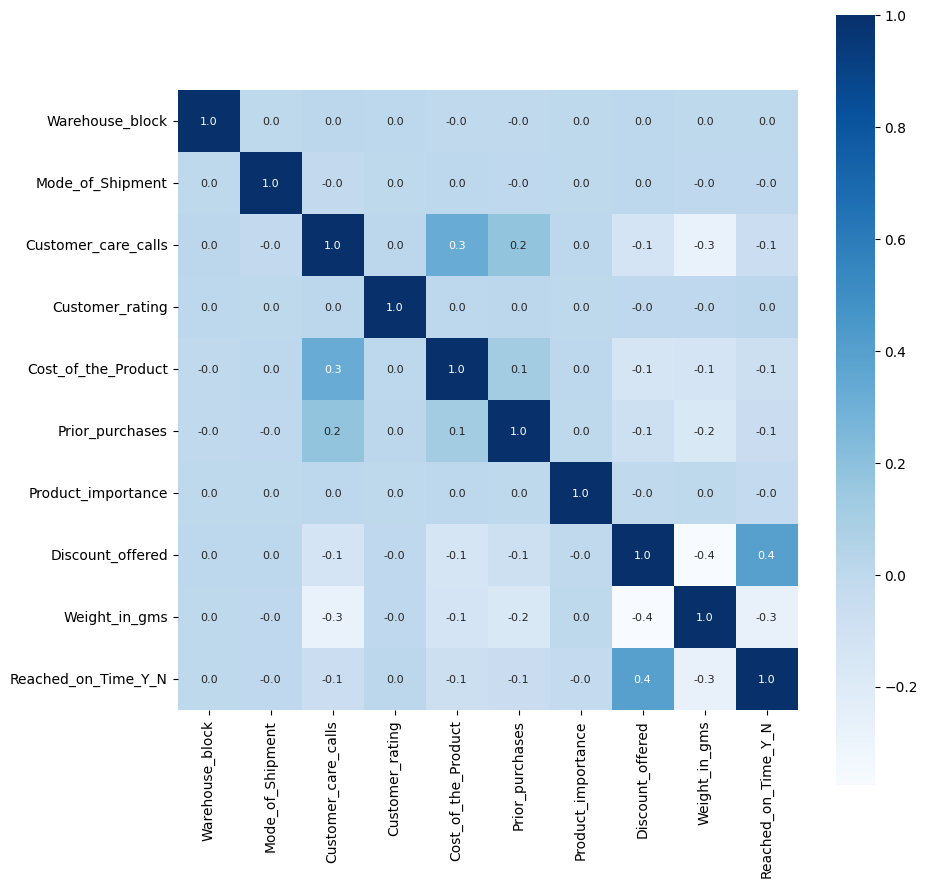

In [27]:
# membuat visualisasi korelasi dataset Shipping
plt.figure(figsize=(10,10))
# sns.heatmap(corr, annot=True,)
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


# **Decision Tree Classification**

In [28]:
# melihat value untuk data target
shipping_df['Reached_on_Time_Y_N'].value_counts()

,count
Reached_on_Time_Y_N,
1,6563
0,4436


Pemagian data K-Fold Validation

In [29]:
# # Memisahkan fitur dengan label
X = shipping_df.drop(columns='Reached_on_Time_Y_N') # Fitur
y = shipping_df['Reached_on_Time_Y_N'].values # Label

In [30]:
# Normalisasi dengan Min Max Normalization
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
X_sc = sc.fit_transform(X)

In [154]:
# Membuat model Decision Tree Classifier
# from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Variabel untuk menyimpan hasil evaluasi
results = {'fold': [], 'accuracy': [], 'precision': [], 'recall': []}

# Melakukan eksperimen dengan jumlah fold yang berbeda (2, 4, 6, 8, 10)
for num_folds in [2, 4, 6, 8, 10]:
    # print(f"Evaluasi dengan {num_folds}-fold Cross-Validation")

    # Define KFold
    k_folds = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Menyimpan hasil metrik evaluasi untuk setiap fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []

    clf = DecisionTreeClassifier(random_state=42)

    # Melakukan K-Fold Cross-Validation
    for train_index, test_index in k_folds.split(X_sc):
        # Membagi data ke dalam data latih dan data uji
        X_train, X_test = X_sc[train_index], X_sc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Melatih model dengan data training
        clf.fit(X_train, y_train)

        # Prediksi menggunakan data testing
        y_pred = clf.predict(X_test)

        # Menghitung metrik evaluasi
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))

    # Menghitung rata-rata hasil evaluasi dari semua fold
    mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
    mean_precision = sum(precision_scores) / len(precision_scores)
    mean_recall = sum(recall_scores) / len(recall_scores)

    # Menyimpan hasil ke dalam dictionary untuk perbandingan
    results['fold'].append(num_folds)
    results['accuracy'].append(mean_accuracy * 100)
    results['precision'].append(mean_precision * 100)
    results['recall'].append(mean_recall * 100)

In [156]:
# Menampilkan hasil perbandingan
results_df_dt = pd.DataFrame(results)
results_df_dt

,fold,accuracy,precision,recall
0,2,63.787553,69.174488,70.927265
1,4,64.469351,70.239124,70.192473
2,6,64.451185,70.425331,69.682081
3,8,64.442047,70.137004,70.396645
4,10,64.532956,70.239529,70.415836


In [138]:

# Menemukan fold dengan akurasi tertinggi
best_fold = results_df_dt.loc[results_df_dt['accuracy'].idxmax()]

# Menampilkan hasil dari fold terbaik
print("\nFold Terbaik Berdasarkan Akurasi:")
print(f"Jumlah Fold: {best_fold['fold']}")
print(f"Akurasi: {best_fold['accuracy']:.2f}%")
print(f"Precision: {best_fold['precision']:.2f}%")
print(f"Recall: {best_fold['recall']:.2f}%")


Fold Terbaik Berdasarkan Akurasi:
Jumlah Fold: 10.0
Akurasi: 64.53%
Precision: 70.24%
Recall: 70.42%


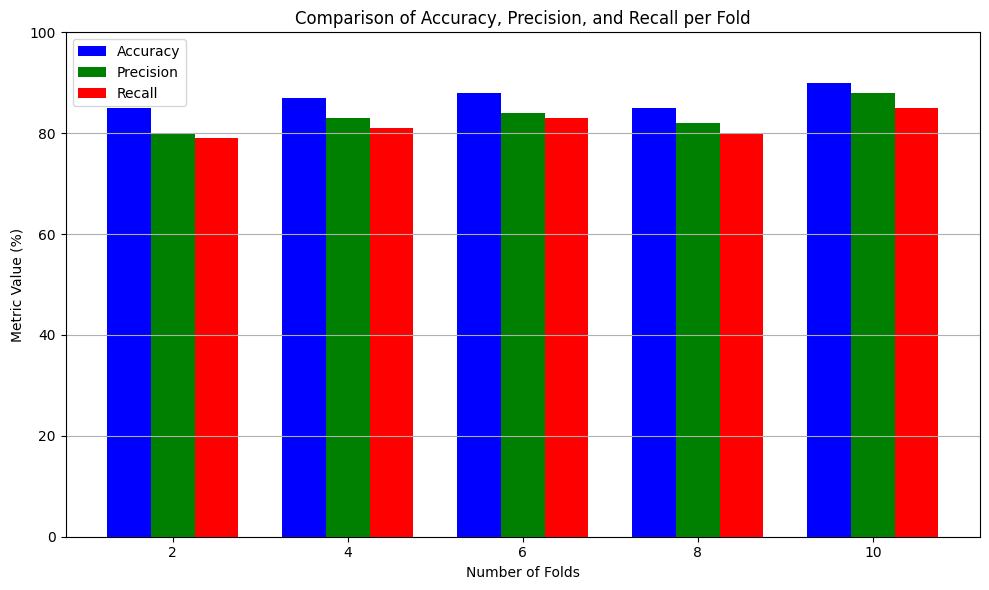

In [151]:
import matplotlib.pyplot as plt
import numpy as np

# Data contoh untuk 5 algoritma dan 5 fold (k-fold: 2, 4, 6, 8, 10)
k_folds = [2, 4, 6, 8, 10]

# Misal hasil evaluasi untuk metrik Accuracy, Precision, Recall untuk Decision Tree
accuracy = [85, 87, 88, 85, 90]  # Contoh akurasi untuk setiap fold
precision = [80, 83, 84, 82, 88]  # Contoh precision untuk setiap fold
recall = [79, 81, 83, 80, 85]  # Contoh recall untuk setiap fold

# Menyusun data dalam bentuk np.array
accuracy = np.array(accuracy)
precision = np.array(precision)
recall = np.array(recall)

# Plotting untuk Accuracy, Precision, dan Recall dengan bar plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25  # Lebar setiap bar
index = np.arange(len(k_folds))  # Indeks k-fold (x-axis)

# Membuat bar untuk setiap metrik
bar1 = ax.bar(index - bar_width, accuracy, bar_width, label='Accuracy', color='b')
bar2 = ax.bar(index, precision, bar_width, label='Precision', color='g')
bar3 = ax.bar(index + bar_width, recall, bar_width, label='Recall', color='r')

# Menambahkan label dan judul
ax.set_xlabel('Number of Folds')
ax.set_ylabel('Metric Value (%)')
ax.set_title('Comparison of Accuracy, Precision, and Recall per Fold')
ax.set_xticks(index)
ax.set_xticklabels(k_folds)
ax.set_ylim(0, 100)

# Menambahkan grid dan legend
ax.grid(True, axis='y')
ax.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()


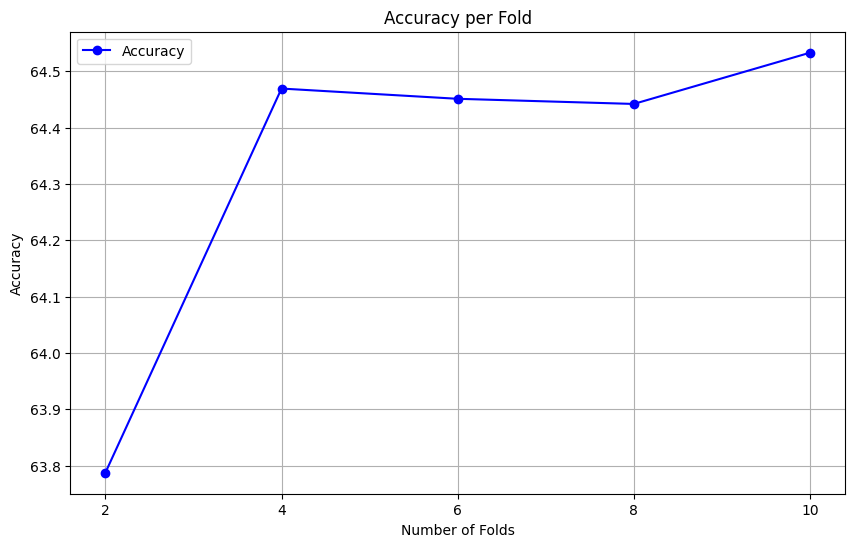

In [152]:
# Misalnya, hasil evaluasi sudah disimpan dalam DataFrame results_df
# Jika tidak, kamu bisa menggunakan hasil DataFrame yang sudah ada dari kode sebelumnya.

# Plot accuracy per fold
plt.figure(figsize=(10, 6))
plt.plot(results_df_dt['fold'], results_df_dt['accuracy'], marker='o', linestyle='-', color='b', label='Accuracy')
plt.xlabel('Number of Folds')
plt.ylabel('Accuracy')
plt.title('Accuracy per Fold')
plt.xticks([2, 4, 6, 8, 10])  # Menyesuaikan jumlah fold yang dievaluasi
plt.legend()
plt.grid(True)
plt.show()

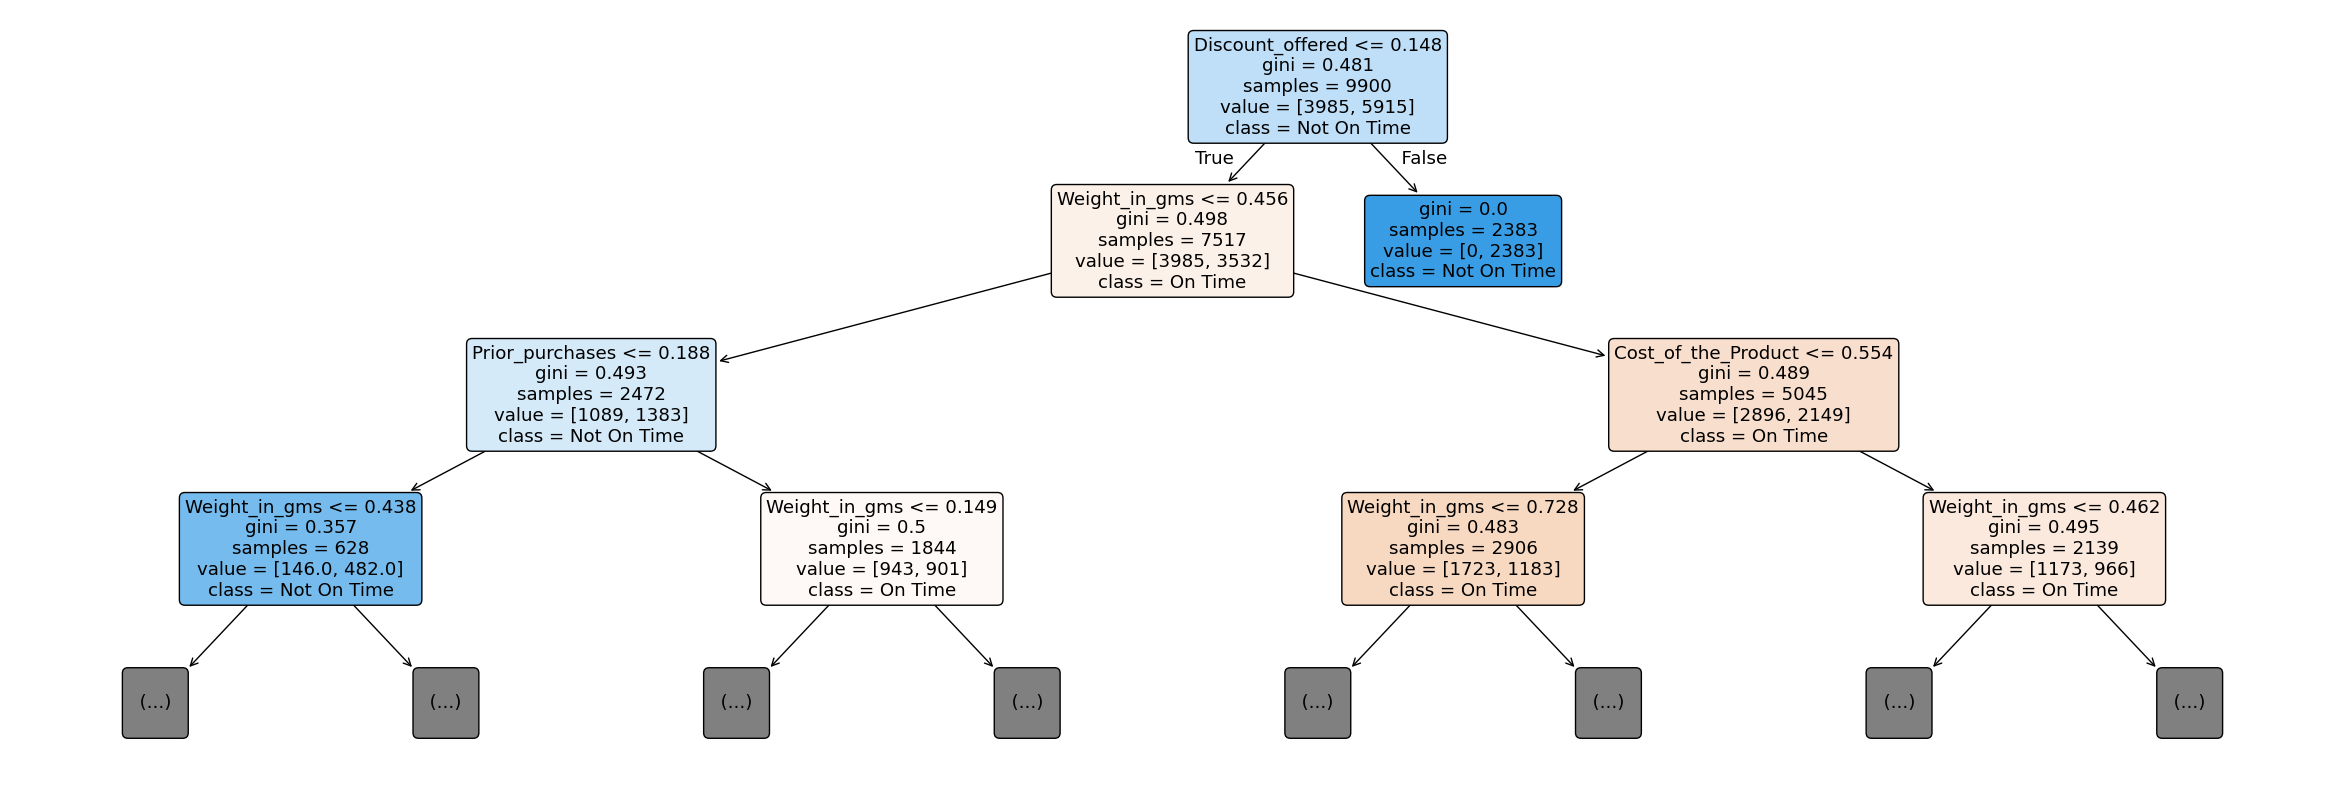

In [140]:
# Membuat visualisasi pohon keputusan
import warnings
warnings.filterwarnings("ignore")
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree

plt.figure(figsize=(30, 10))  # Ukuran lebih besar
plot_tree(clf,
          feature_names=X.columns,
          class_names=['On Time', 'Not On Time'],
          max_depth=3,
          filled=True,
          rounded=True)
# plt.figure(figsize=(5, 8))
# plot_tree(clf, feature_names=X_train.columns, class_names=['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
#                                                            'Cost_of_the_Product','Discount_offered','Weight_in_gms','0.on.Time_Y.N'], filled=True, rounded=True)
plt.show()

# **Naive Bayes Classification**

Pembagian Data dengan K-Fold Validation**

In [45]:
# Memisahkan fitur dengan label
X = shipping_df.drop(columns='Reached_on_Time_Y_N')
y = shipping_df['Reached_on_Time_Y_N'].values

In [46]:
# Normalisasi dengan Min Max Normalization
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
X_sc = sc.fit_transform(X)

Pemodelan Algoritma NBC

In [49]:
# Membuat model Naive Bayes
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold

# Variabel untuk menyimpan hasil evaluasi
results_nbc = {'fold': [], 'accuracy': [], 'precision': [], 'recall': []}

# Melakukan eksperimen dengan jumlah fold yang berbeda (2, 4, 6, 8, 10)
for num_folds in [2, 4, 6, 8, 10]:

    k_folds = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Menyimpan hasil metrik evaluasi untuk setiap fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []

    # Membuat model Gaussian Naive Bayes
    model_nbc = GaussianNB()

    # Melakukan K-Fold Cross-Validation
    for train_index, test_index in k_folds.split(X_sc):
        # Membagi data ke dalam data latih dan uji
        X_train, X_test = X_sc[train_index], X_sc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Melatih model pada data latih
        model_nbc.fit(X_train, y_train)

        # Prediksi pada data uji
        y_pred = model_nbc.predict(X_test)

        # Menyimpan hasil evaluasi untuk setiap fold
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, zero_division=1))
        recall_scores.append(recall_score(y_test, y_pred, zero_division=1))

    # Menghitung rata-rata hasil evaluasi dari semua fold
    mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
    mean_precision = sum(precision_scores) / len(precision_scores)
    mean_recall = sum(recall_scores) / len(recall_scores)

    # Menyimpan hasil ke dalam dictionary untuk perbandingan
    results_nbc['fold'].append(num_folds)
    results_nbc['accuracy'].append(mean_accuracy * 100)
    results_nbc['precision'].append(mean_precision * 100)
    results_nbc['recall'].append(mean_recall * 100)

# Menyimpan hasil evaluasi ke dalam DataFrame
results_df_nbc = pd.DataFrame(results_nbc)

In [50]:
# Menampilkan hasil perbandingan semua fold
print("\nHasil Evaluasi untuk Naive Bayes:")
results_df_nbc


Hasil Evaluasi untuk Naive Bayes:


,fold,accuracy,precision,recall
0,2,65.105912,97.621023,42.555774
1,4,65.142386,97.700102,42.595842
2,6,65.169577,97.700213,42.632554
3,8,65.160586,97.669476,42.640476
4,10,65.196923,97.736207,42.675388


In [51]:
# Menemukan fold dengan akurasi tertinggi
best_fold_nbc = results_df_nbc.loc[results_df_nbc['accuracy'].idxmax()]

# Menampilkan hasil dari fold terbaik
print("\nFold Terbaik Berdasarkan Akurasi untuk Naive Bayes:")
print(f"Jumlah Fold: {best_fold_nbc['fold']}")
print(f"Akurasi: {best_fold_nbc['accuracy']:.2f}%")
print(f"Precision: {best_fold_nbc['precision']:.2f}%")
print(f"Recall: {best_fold_nbc['recall']:.2f}%")


Fold Terbaik Berdasarkan Akurasi untuk Naive Bayes:
Jumlah Fold: 10.0
Akurasi: 65.20%
Precision: 97.74%
Recall: 42.68%


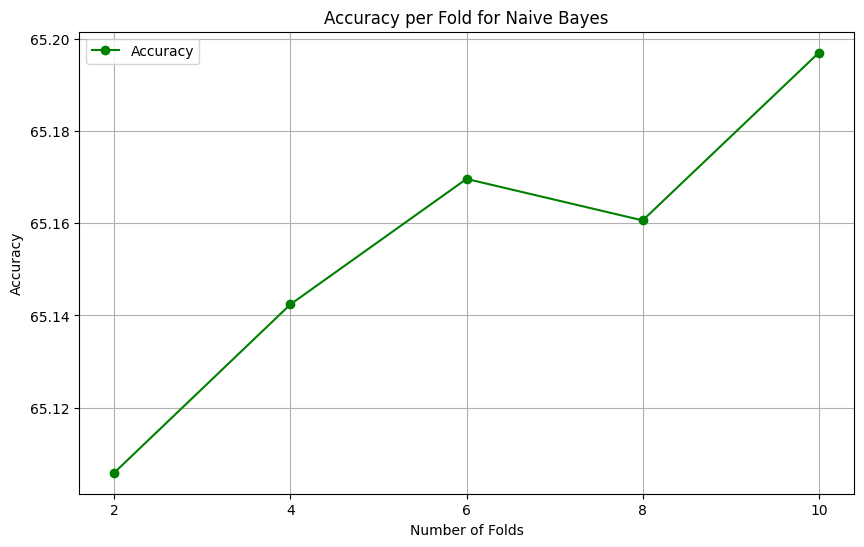

In [52]:
# Plot accuracy per fold
plt.figure(figsize=(10, 6))
plt.plot(results_df_nbc['fold'], results_df_nbc['accuracy'], marker='o', linestyle='-', color='g', label='Accuracy')
plt.xlabel('Number of Folds')
plt.ylabel('Accuracy')
plt.title('Accuracy per Fold for Naive Bayes')
plt.xticks([2, 4, 6, 8, 10])  # Menyesuaikan jumlah fold yang dievaluasi
plt.legend()
plt.grid(True)
plt.show()

# **Pemodelan Algoritma K-NN**

**Pembagian K-Fold Validation**

In [53]:
# Memisahkan fitur dengan label
X = shipping_df.drop(columns='Reached_on_Time_Y_N')
y = shipping_df['Reached_on_Time_Y_N'].values

In [88]:
# Normalisasi dengan Min Max Normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

sc = MinMaxScaler(feature_range = (0, 1))
X_sc = sc.fit_transform(X)

Percobaa K-NN dengan 5 fold

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score

# Variabel untuk menyimpan hasil evaluasi
results_knn = {'fold': [], 'k_value': [], 'accuracy': [], 'precision': [], 'recall': []}

# Variabel untuk melacak nilai K dan fold terbaik
best_accuracy = -1
best_k = None
best_num_folds = None
best_precision = None
best_recall = None

# Melakukan eksperimen dengan jumlah fold yang berbeda (2, 4, 6, 8, 10)
for num_folds in [2, 4, 6, 8, 10]:

    k_folds = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Menyimpan hasil metrik evaluasi untuk setiap fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []

    # Melakukan uji nilai K dari 3 hingga 11 (nilai K yang lebih kecil cenderung lebih mudah overfitting)
    for k in range(3, 12, 2):  # Uji nilai K: 3, 5, 7, 9, 11
        # print(f"\nEvaluasi untuk K={k}")

        # Melakukan K-Fold Cross-Validation
        for train_index, test_index in k_folds.split(X_sc):
            # Membagi data ke dalam data latih dan uji
            X_train, X_test = X_sc[train_index], X_sc[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # Melatih model dengan data latih
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train, y_train)

            # Prediksi pada data uji
            y_pred = knn.predict(X_test)

            # Menyimpan hasil evaluasi untuk setiap fold
            accuracy_scores.append(accuracy_score(y_test, y_pred))
            precision_scores.append(precision_score(y_test, y_pred, zero_division=1))
            recall_scores.append(recall_score(y_test, y_pred, zero_division=1))

        # Menghitung rata-rata hasil evaluasi dari semua fold
        mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
        mean_precision = sum(precision_scores) / len(precision_scores)
        mean_recall = sum(recall_scores) / len(recall_scores)

        # Cek jika model dengan kombinasi fold dan K saat ini memiliki akurasi terbaik
        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_k = k
            best_num_folds = num_folds
            best_precision = mean_precision
            best_recall = mean_recall

        # Menyimpan hasil ke dalam dictionary untuk perbandingan
        results_knn['fold'].append(num_folds)
        results_knn['k_value'].append(k)
        results_knn['accuracy'].append(mean_accuracy * 100)
        results_knn['precision'].append(mean_precision * 100)
        results_knn['recall'].append(mean_recall * 100)

# Menyimpan hasil evaluasi ke dalam DataFrame
results_df_knn = pd.DataFrame(results_knn)

In [121]:
# Menampilkan hasil perbandingan
print("Perbandingan hasil evaluasi K-NN:")
results_df_knn

Perbandingan hasil evaluasi K-NN:


,fold,k_value,accuracy,precision,recall
0,2,3,63.787626,70.684258,67.175460
1,2,5,63.692162,70.699609,66.863947
2,2,7,63.705797,70.911612,66.430102
3,2,9,63.758066,71.112697,66.137033
4,2,11,63.813079,71.318622,65.852230
5,4,3,64.187658,70.781201,68.095552
6,4,5,64.042174,70.992837,67.260427
7,4,7,64.193697,71.309050,66.997163
8,4,9,64.312642,71.613060,66.683306
9,4,11,64.385831,71.872240,66.342948


In [125]:
# # Menemukan fold dengan akurasi tertinggi
best_fold_knn = results_df_knn.loc[results_df_knn['accuracy'].idxmax()]

# Menampilkan hasil dari fold terbaik
print("\nFold Terbaik Berdasarkan Akurasi untuk K-NN:")
print(f"Jumlah Fold: {best_fold_knn['fold']}")
print(f"Nilai K: {best_fold_knn['k_value']}")
print(f"Akurasi: {best_fold_knn['accuracy']:.2f}%")
print(f"Precision: {best_fold_knn['precision']:.2f}%")
print(f"Recall: {best_fold_knn['recall']:.2f}%")


Fold Terbaik Berdasarkan Akurasi untuk K-NN:
Jumlah Fold: 8.0
Nilai K: 11.0
Akurasi: 64.53%
Precision: 71.94%
Recall: 66.57%


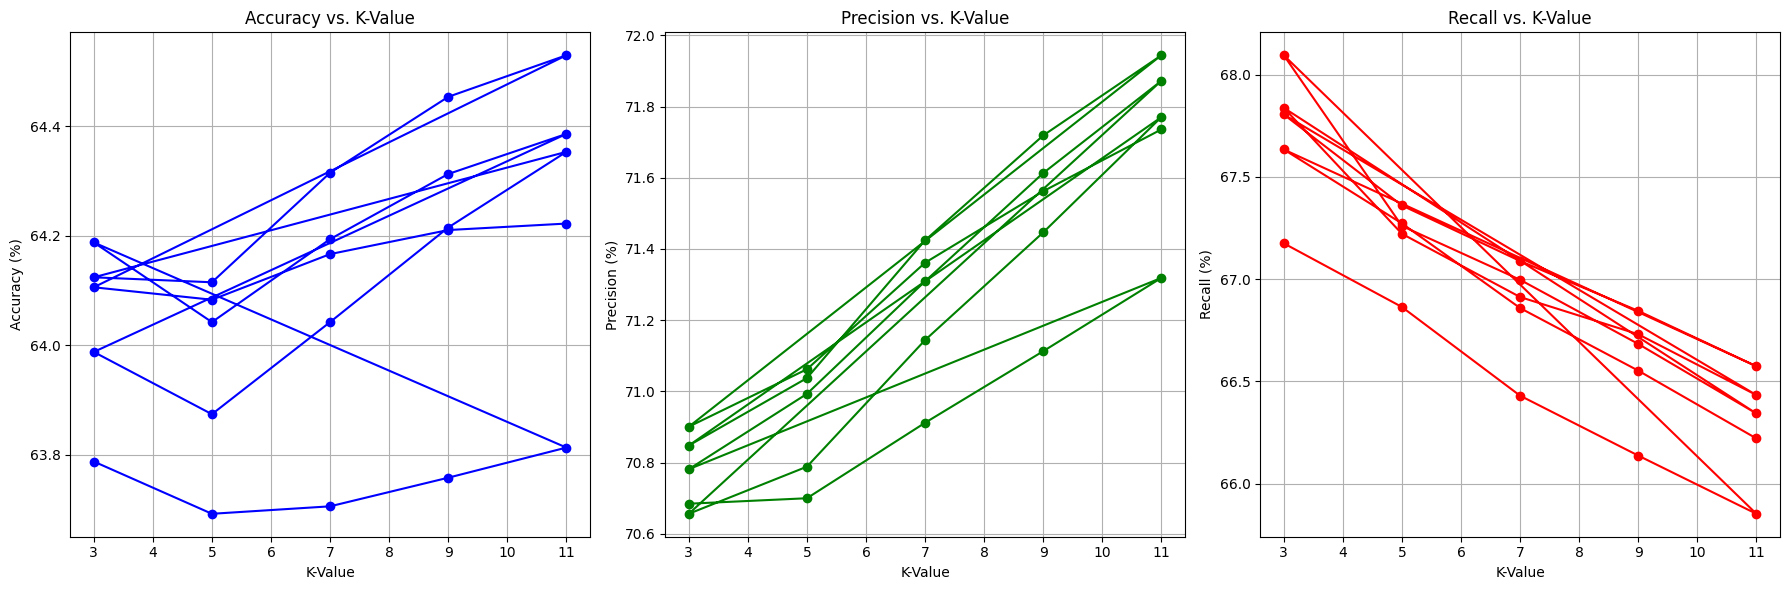

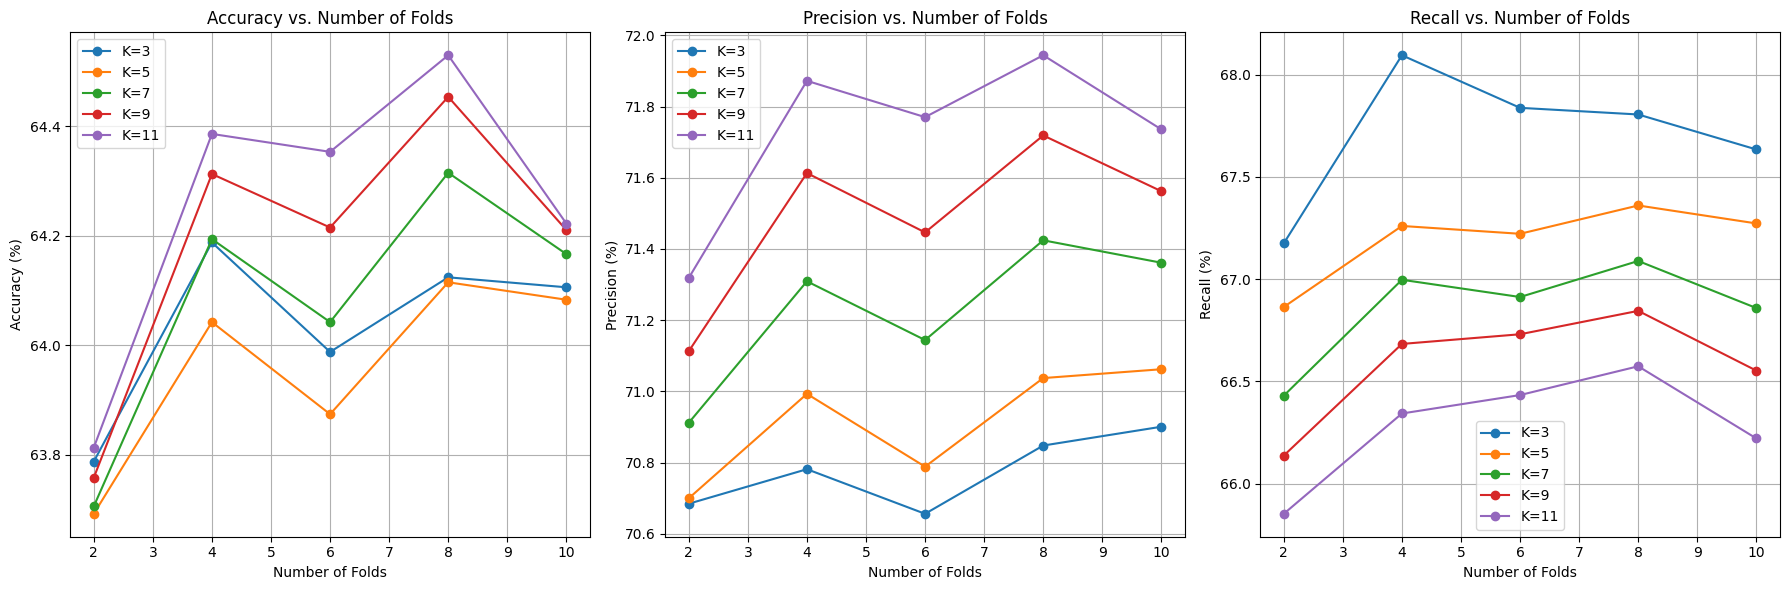

In [127]:

# Visualisasi untuk Accuracy, Precision, dan Recall
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Visualisasi Accuracy
ax[0].plot(results_df_knn['k_value'], results_df_knn['accuracy'], marker='o', linestyle='-', color='b')
ax[0].set_title('Accuracy vs. K-Value')
ax[0].set_xlabel('K-Value')
ax[0].set_ylabel('Accuracy (%)')
ax[0].grid(True)

# Visualisasi Precision
ax[1].plot(results_df_knn['k_value'], results_df_knn['precision'], marker='o', linestyle='-', color='g')
ax[1].set_title('Precision vs. K-Value')
ax[1].set_xlabel('K-Value')
ax[1].set_ylabel('Precision (%)')
ax[1].grid(True)

# Visualisasi Recall
ax[2].plot(results_df_knn['k_value'], results_df_knn['recall'], marker='o', linestyle='-', color='r')
ax[2].set_title('Recall vs. K-Value')
ax[2].set_xlabel('K-Value')
ax[2].set_ylabel('Recall (%)')
ax[2].grid(True)

# Tampilkan plot
plt.tight_layout()
plt.show()

# Visualisasi berdasarkan jumlah fold untuk setiap metrik
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Accuracy per Fold
for k in results_df_knn['k_value'].unique():
    data_k = results_df_knn[results_df_knn['k_value'] == k]
    ax[0].plot(data_k['fold'], data_k['accuracy'], marker='o', linestyle='-', label=f'K={k}')
ax[0].set_title('Accuracy vs. Number of Folds')
ax[0].set_xlabel('Number of Folds')
ax[0].set_ylabel('Accuracy (%)')
ax[0].legend()
ax[0].grid(True)

# Precision per Fold
for k in results_df_knn['k_value'].unique():
    data_k = results_df_knn[results_df_knn['k_value'] == k]
    ax[1].plot(data_k['fold'], data_k['precision'], marker='o', linestyle='-', label=f'K={k}')
ax[1].set_title('Precision vs. Number of Folds')
ax[1].set_xlabel('Number of Folds')
ax[1].set_ylabel('Precision (%)')
ax[1].legend()
ax[1].grid(True)

# Recall per Fold
for k in results_df_knn['k_value'].unique():
    data_k = results_df_knn[results_df_knn['k_value'] == k]
    ax[2].plot(data_k['fold'], data_k['recall'], marker='o', linestyle='-', label=f'K={k}')
ax[2].set_title('Recall vs. Number of Folds')
ax[2].set_xlabel('Number of Folds')
ax[2].set_ylabel('Recall (%)')
ax[2].legend()
ax[2].grid(True)

# Tampilkan plot
plt.tight_layout()
plt.show()


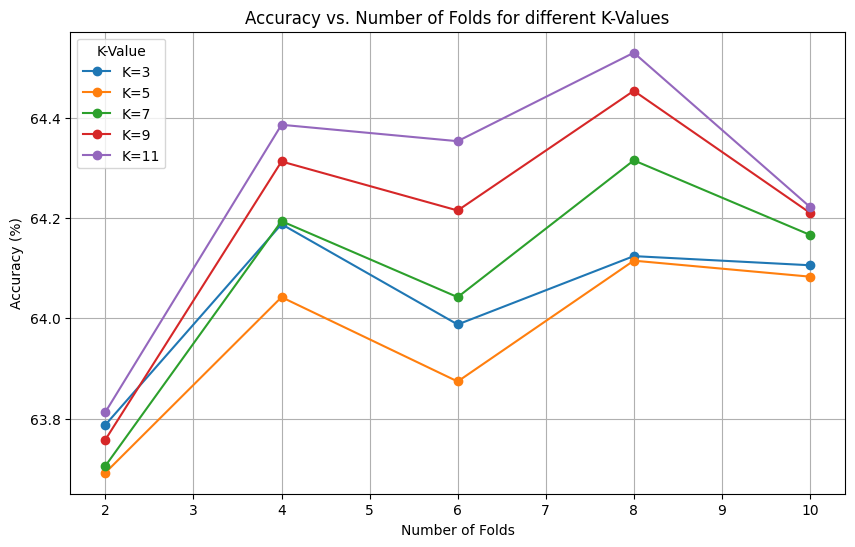

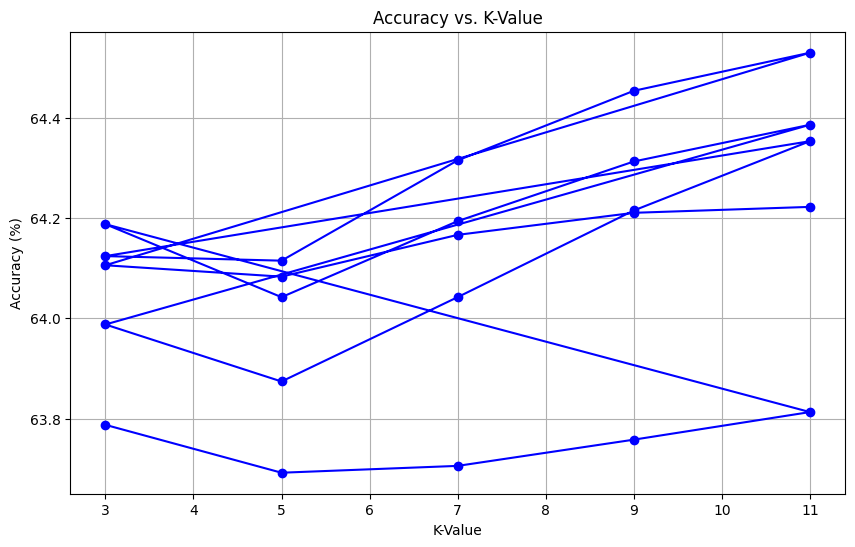

In [128]:
import matplotlib.pyplot as plt

# Visualisasi Accuracy per K-Fold
plt.figure(figsize=(10, 6))

# Plot Accuracy per Fold untuk setiap nilai K
for k in results_df_knn['k_value'].unique():
    data_k = results_df_knn[results_df_knn['k_value'] == k]
    plt.plot(data_k['fold'], data_k['accuracy'], marker='o', linestyle='-', label=f'K={k}')

plt.title('Accuracy vs. Number of Folds for different K-Values')
plt.xlabel('Number of Folds')
plt.ylabel('Accuracy (%)')
plt.legend(title='K-Value')
plt.grid(True)
plt.show()

# Visualisasi Accuracy per K-Value
plt.figure(figsize=(10, 6))

# Plot Accuracy per K-Value
plt.plot(results_df_knn['k_value'], results_df_knn['accuracy'], marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. K-Value')
plt.xlabel('K-Value')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()


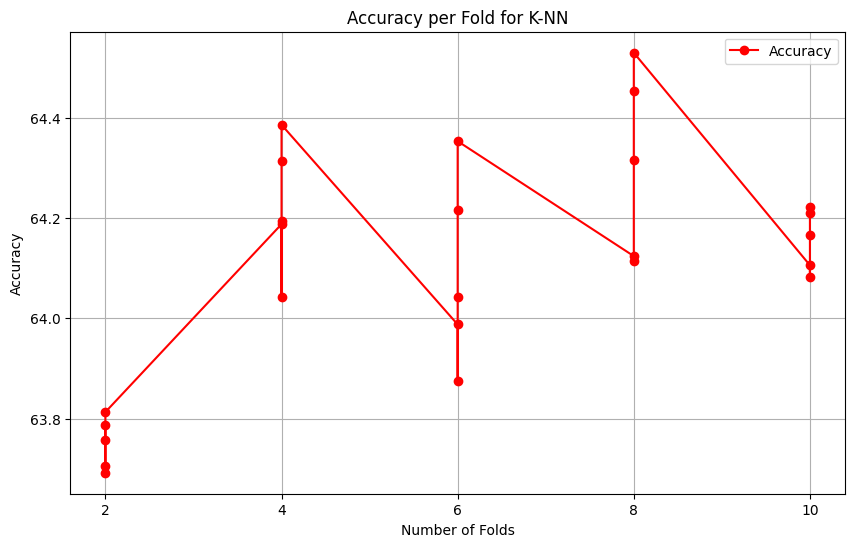

In [126]:
# Plot accuracy per fold
plt.figure(figsize=(10, 6))
plt.plot(results_df_knn['fold'], results_df_knn['accuracy'], marker='o', linestyle='-', color='r', label='Accuracy')
plt.xlabel('Number of Folds')
plt.ylabel('Accuracy')
plt.title('Accuracy per Fold for K-NN')
plt.xticks([2, 4, 6, 8, 10])  # Menyesuaikan jumlah fold yang dievaluasi
plt.legend()
plt.grid(True)
plt.show()

# **Pembagian Data dengan K-Fold Validation**

In [68]:
# Memisahkan fitur dengan label
X = shipping_df.drop(columns='Reached_on_Time_Y_N')
y = shipping_df['Reached_on_Time_Y_N'].values

In [69]:
# Normalisasi dengan Min Max Normalization
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
X_sc = sc.fit_transform(X)

In [70]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

k_folds = KFold(n_splits=10)

# **Algoritma Random Forest**

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# # Membuat model
# model_rf = RandomForestClassifier(n_estimators=50, criterion='entropy', class_weight='balanced', random_state=32)

# accuracy_rf = cross_val_score(model_rf, X_sc, y, cv=k_folds, scoring='accuracy').mean()
# precision_rf = cross_val_score(model_rf, X_sc, y, cv=k_folds, scoring='precision_weighted').mean()
# recall_rf = cross_val_score(model_rf, X_sc, y, cv=k_folds, scoring='recall_weighted').mean()

# print('Average Accuracy CV Score:', round(accuracy_rf *100, 2))
# print('Average Precision CV Score:', round(precision_rf *100, 2))
# print('Average Recall CV Score:', round(recall_rf *100, 2))



In [ ]:
# accuracy_rf = cross_val_score(model_rf, X_sc, y, cv=k_folds, scoring='accuracy').mean()
# print(accuracy_rf)

0.6637738439904045


In [72]:
# Variabel untuk menyimpan hasil evaluasi
results_rf = {'fold': [], 'accuracy': [], 'precision': [], 'recall': []}

# Melakukan eksperimen dengan jumlah fold yang berbeda (2, 4, 6, 8, 10)
for num_folds in [2, 4, 6, 8, 10]:

    k_folds = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Menyimpan hasil metrik evaluasi untuk setiap fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []

    # Membuat model Random Forest
    model_rf = RandomForestClassifier(n_estimators=50, criterion='entropy', class_weight='balanced', random_state=32)

    # Melakukan K-Fold Cross-Validation
    for train_index, test_index in k_folds.split(X_sc):
        # Membagi data ke dalam data latih dan uji
        X_train, X_test = X_sc[train_index], X_sc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Melatih model dengan data latih
        model_rf.fit(X_train, y_train)

        # Prediksi pada data uji
        y_pred = model_rf.predict(X_test)

        # Menyimpan hasil evaluasi untuk setiap fold
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, zero_division=1, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, zero_division=1, average='weighted'))

    # Menghitung rata-rata hasil evaluasi dari semua fold
    mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
    mean_precision = sum(precision_scores) / len(precision_scores)
    mean_recall = sum(recall_scores) / len(recall_scores)

    # Menyimpan hasil ke dalam dictionary untuk perbandingan
    results_rf['fold'].append(num_folds)
    results_rf['accuracy'].append(mean_accuracy * 100)
    results_rf['precision'].append(mean_precision * 100)
    results_rf['recall'].append(mean_recall * 100)

# Menyimpan hasil evaluasi ke dalam DataFrame
results_df_rf = pd.DataFrame(results_rf)

In [73]:
# Menampilkan hasil perbandingan semua fold
print("\nHasil Evaluasi untuk Random Forest:")
results_df_rf


Hasil Evaluasi untuk Random Forest:


,fold,accuracy,precision,recall
0,2,65.805963,67.478631,65.805963
1,4,65.796799,67.602166,65.796799
2,6,65.505873,67.301791,65.505873
3,8,66.005935,67.741447,66.005935
4,10,65.742162,67.735892,65.742162


In [74]:
# Menemukan fold dengan akurasi tertinggi
best_fold_rf = results_df_rf.loc[results_df_rf['accuracy'].idxmax()]

# Menampilkan hasil dari fold terbaik
print("\nFold Terbaik Berdasarkan Akurasi untuk Random Forest:")
print(f"Jumlah Fold: {best_fold_rf['fold']}")
print(f"Akurasi: {best_fold_rf['accuracy']:.2f}%")
print(f"Precision: {best_fold_rf['precision']:.2f}%")
print(f"Recall: {best_fold_rf['recall']:.2f}%")


Fold Terbaik Berdasarkan Akurasi untuk Random Forest:
Jumlah Fold: 8.0
Akurasi: 66.01%
Precision: 67.74%
Recall: 66.01%


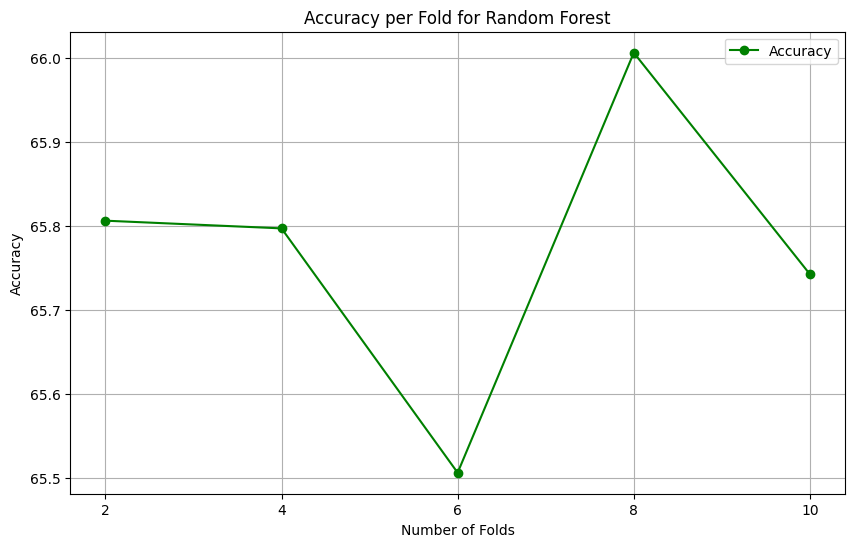

In [75]:
# Plot accuracy per fold
plt.figure(figsize=(10, 6))
plt.plot(results_df_rf['fold'], results_df_rf['accuracy'], marker='o', linestyle='-', color='g', label='Accuracy')
plt.xlabel('Number of Folds')
plt.ylabel('Accuracy')
plt.title('Accuracy per Fold for Random Forest')
plt.xticks([2, 4, 6, 8, 10])  # Menyesuaikan jumlah fold yang dievaluasi
plt.legend()
plt.grid(True)
plt.show()

# **Algoritma SVM**

In [78]:
from sklearn.svm import SVC

# # Membuat model SVM
# model_svm = SVC(kernel='rbf', random_state=42, gamma=0.1)

# # Evaluasi model dengan cross-validation
# accuracy_svm = cross_val_score(model_svm, X_sc, y, cv=k_folds, scoring='accuracy').mean()
# precision_svm = cross_val_score(model_svm, X_sc, y, cv=k_folds, scoring='precision_weighted').mean()
# recall_svm = cross_val_score(model_svm, X_sc, y, cv=k_folds, scoring='recall_weighted').mean()

# # Menampilkan hasil evaluasi
# print('Average Accuracy CV Score:', round(accuracy_svm * 100, 2))
# print('Average Precision CV Score:', round(precision_svm * 100, 2))
# print('Average Recall CV Score:', round(recall_svm * 100, 2))

In [79]:
# Variabel untuk menyimpan hasil evaluasi
results_svm = {'fold': [], 'accuracy': [], 'precision': [], 'recall': []}

# Melakukan eksperimen dengan jumlah fold yang berbeda (2, 4, 6, 8, 10)
for num_folds in [2, 4, 6, 8, 10]:

    k_folds = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Menyimpan hasil metrik evaluasi untuk setiap fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []

    # Membuat model SVM dengan kernel rbf dan gamma=0.1
    model_svm = SVC(kernel='rbf', random_state=42, gamma=0.1)

    # Melakukan K-Fold Cross-Validation
    for train_index, test_index in k_folds.split(X_sc):
        # Membagi data ke dalam data latih dan uji
        X_train, X_test = X_sc[train_index], X_sc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Melatih model dengan data latih
        model_svm.fit(X_train, y_train)

        # Prediksi pada data uji
        y_pred = model_svm.predict(X_test)

        # Menyimpan hasil evaluasi untuk setiap fold
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, zero_division=1, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, zero_division=1, average='weighted'))

    # Menghitung rata-rata hasil evaluasi dari semua fold
    mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
    mean_precision = sum(precision_scores) / len(precision_scores)
    mean_recall = sum(recall_scores) / len(recall_scores)

    # Menyimpan hasil ke dalam dictionary untuk perbandingan
    results_svm['fold'].append(num_folds)
    results_svm['accuracy'].append(mean_accuracy * 100)
    results_svm['precision'].append(mean_precision * 100)
    results_svm['recall'].append(mean_recall * 100)

# Menyimpan hasil evaluasi ke dalam DataFrame
results_df_svm = pd.DataFrame(results_svm)

In [80]:
# Menampilkan hasil perbandingan semua fold
print("\nHasil Evaluasi untuk SVM:")
results_df_svm


Hasil Evaluasi untuk SVM:


,fold,accuracy,precision,recall
0,2,66.315080,69.203369,66.315080
1,4,66.296994,69.279590,66.296994
2,6,66.278701,69.169902,66.278701
3,8,66.351581,69.311459,66.351581
4,10,66.278849,69.247466,66.278849


In [81]:
# Menemukan fold dengan akurasi tertinggi
best_fold_svm = results_df_svm.loc[results_df_svm['accuracy'].idxmax()]

# Menampilkan hasil dari fold terbaik
print("\nFold Terbaik Berdasarkan Akurasi untuk SVM:")
print(f"Jumlah Fold: {best_fold_svm['fold']}")
print(f"Akurasi: {best_fold_svm['accuracy']:.2f}%")
print(f"Precision: {best_fold_svm['precision']:.2f}%")
print(f"Recall: {best_fold_svm['recall']:.2f}%")


Fold Terbaik Berdasarkan Akurasi untuk SVM:
Jumlah Fold: 8.0
Akurasi: 66.35%
Precision: 69.31%
Recall: 66.35%


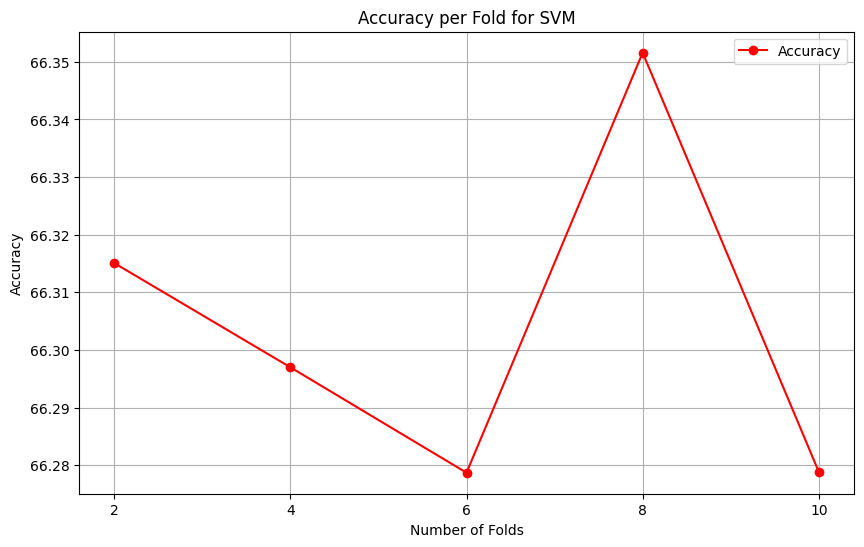

In [82]:
# Plot accuracy per fold
plt.figure(figsize=(10, 6))
plt.plot(results_df_svm['fold'], results_df_svm['accuracy'], marker='o', linestyle='-', color='r', label='Accuracy')
plt.xlabel('Number of Folds')
plt.ylabel('Accuracy')
plt.title('Accuracy per Fold for SVM')
plt.xticks([2, 4, 6, 8, 10])  # Menyesuaikan jumlah fold yang dievaluasi
plt.legend()
plt.grid(True)
plt.show()

# Perbandingan 5 Algoritma

In [112]:
# Mengambil hasil evaluasi dari masing-masing algoritma (hanya Accuracy, Precision, dan Recall)
# Decision Tree
acc_dt = results_df_dt[['fold', 'accuracy', 'precision', 'recall']]
acc_dt = acc_dt.rename(columns={'accuracy': 'Decision Tree Accuracy',
                                'precision': 'Decision Tree Precision',
                                'recall': 'Decision Tree Recall'})

# Naive Bayes
acc_nbc = results_df_nbc[['fold', 'accuracy', 'precision', 'recall']]
acc_nbc = acc_nbc.rename(columns={'accuracy': 'Naive Bayes Accuracy',
                                  'precision': 'Naive Bayes Precision',
                                  'recall': 'Naive Bayes Recall'})

# K-NN
acc_knn = results_df_knn[['fold', 'accuracy', 'precision', 'recall']]
acc_knn = acc_knn.rename(columns={'accuracy': 'K-NN Accuracy',
                                  'precision': 'K-NN Precision',
                                  'recall': 'K-NN Recall'})

# Random Forest
acc_rf = results_df_rf[['fold', 'accuracy', 'precision', 'recall']]
acc_rf = acc_rf.rename(columns={'accuracy': 'Random Forest Accuracy',
                                'precision': 'Random Forest Precision',
                                'recall': 'Random Forest Recall'})

# SVM
acc_svm = results_df_svm[['fold', 'accuracy', 'precision', 'recall']]
acc_svm = acc_svm.rename(columns={'accuracy': 'SVM Accuracy',
                                  'precision': 'SVM Precision',
                                  'recall': 'SVM Recall'})

# Gabungkan hasil evaluasi dari setiap algoritma
perbandingan = pd.concat([acc_dt[['Decision Tree Accuracy', 'Decision Tree Precision', 'Decision Tree Recall']],
                          acc_nbc[['Naive Bayes Accuracy', 'Naive Bayes Precision', 'Naive Bayes Recall']],
                          acc_knn[['K-NN Accuracy', 'K-NN Precision', 'K-NN Recall']],
                          acc_rf[['Random Forest Accuracy', 'Random Forest Precision', 'Random Forest Recall']],
                          acc_svm[['SVM Accuracy', 'SVM Precision', 'SVM Recall']]], axis=1)

# Menampilkan DataFrame perbandingan
result_perbandingan = pd.DataFrame(perbandingan)
result_perbandingan

,Decision Tree Accuracy,Decision Tree Precision,Decision Tree Recall,Naive Bayes Accuracy,Naive Bayes Precision,Naive Bayes Recall,K-NN Accuracy,K-NN Precision,K-NN Recall,Random Forest Accuracy,Random Forest Precision,Random Forest Recall,SVM Accuracy,SVM Precision,SVM Recall
0,63.787553,69.174488,70.927265,65.105912,97.621023,42.555774,63.787626,70.684258,67.175460,65.805963,67.478631,65.805963,66.315080,69.203369,66.315080
1,64.469351,70.239124,70.192473,65.142386,97.700102,42.595842,64.196764,73.592637,62.951112,65.796799,67.602166,65.796799,66.296994,69.279590,66.296994
2,64.451185,70.425331,69.682081,65.169577,97.700213,42.632554,64.166458,75.715341,59.696756,65.505873,67.301791,65.505873,66.278701,69.169902,66.278701
3,64.442047,70.137004,70.396645,65.160586,97.669476,42.640476,64.187658,70.781201,68.095552,66.005935,67.741447,66.005935,66.351581,69.311459,66.351581
4,64.532956,70.239529,70.415836,65.196923,97.736207,42.675388,64.637701,74.013581,63.486155,65.742162,67.735892,65.742162,66.278849,69.247466,66.278849
5,NaN,NaN,NaN,NaN,NaN,NaN,64.518000,76.025394,60.149314,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,63.987692,70.655927,67.838349,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,64.742266,74.038339,63.685144,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,64.584642,76.098826,60.220940,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,64.123998,70.847672,67.805832,NaN,NaN,NaN,NaN,NaN,NaN


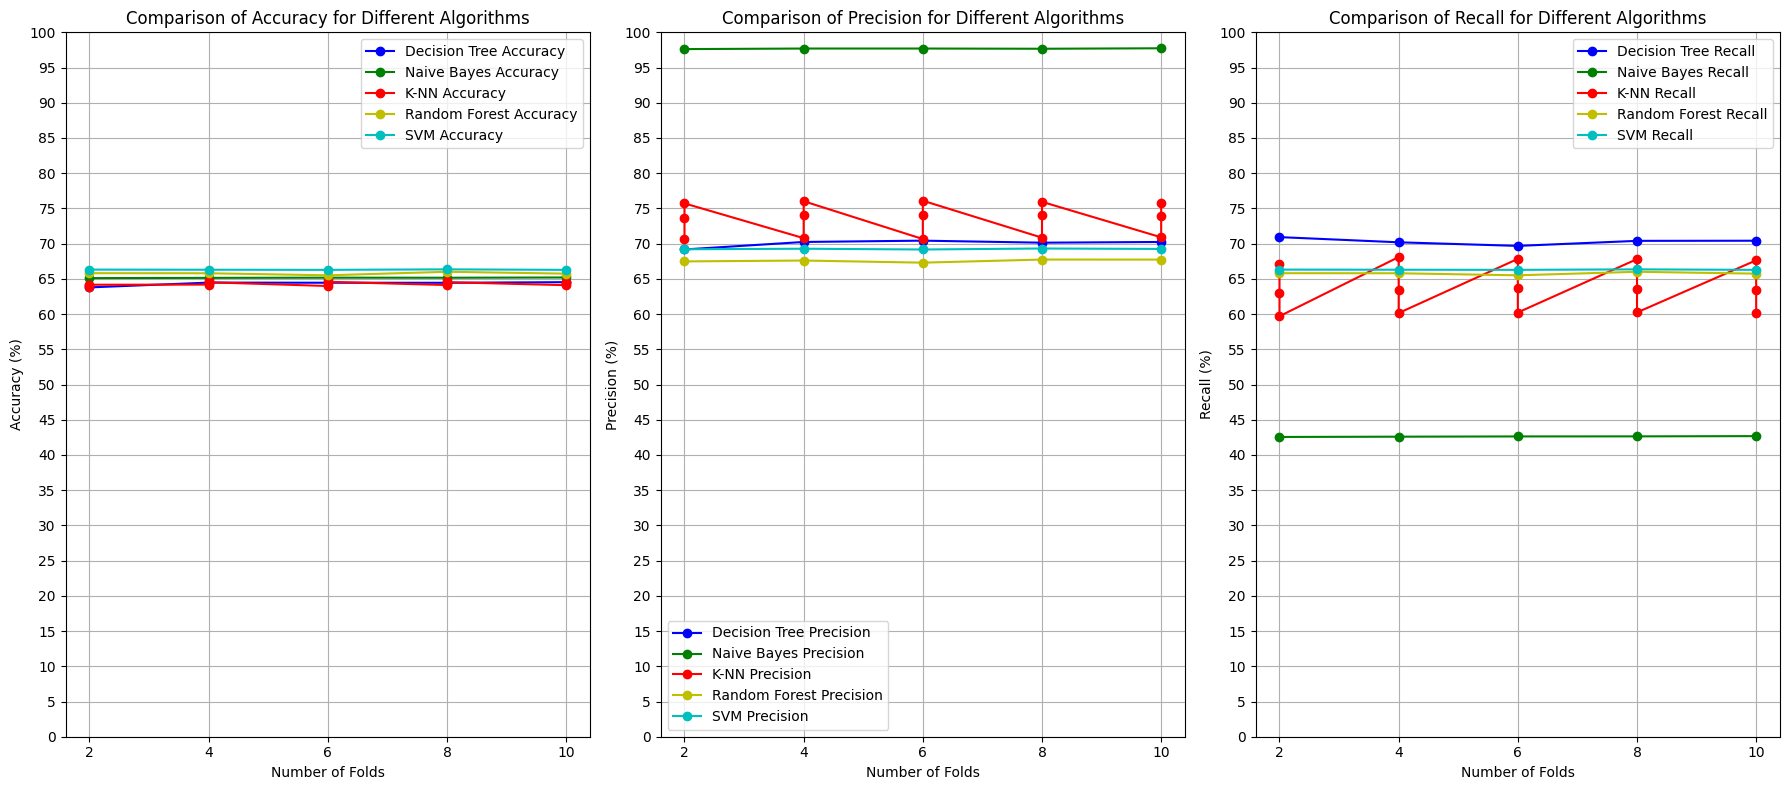

In [145]:
import matplotlib.pyplot as plt

# Membuat figure untuk perbandingan metrik
plt.figure(figsize=(18, 8))

# Plotting untuk Accuracy
plt.subplot(131)  # 1 baris, 3 kolom, subplot pertama
plt.plot(acc_dt['fold'], acc_dt['Decision Tree Accuracy'], linestyle='-', marker='o', color='b', label='Decision Tree Accuracy')
plt.plot(acc_nbc['fold'], acc_nbc['Naive Bayes Accuracy'], linestyle='-', marker='o', color='g', label='Naive Bayes Accuracy')
plt.plot(acc_knn['fold'], acc_knn['K-NN Accuracy'], linestyle='-', marker='o', color='r', label='K-NN Accuracy')
plt.plot(acc_rf['fold'], acc_rf['Random Forest Accuracy'], linestyle='-', marker='o', color='y', label='Random Forest Accuracy')
plt.plot(acc_svm['fold'], acc_svm['SVM Accuracy'], linestyle='-', marker='o', color='c', label='SVM Accuracy')

plt.title('Comparison of Accuracy for Different Algorithms')
plt.xlabel('Number of Folds')
plt.ylabel('Accuracy (%)')
plt.xticks([2, 4, 6, 8, 10])  # Menampilkan k-fold pada sumbu X
plt.yticks(range(0, 101, 5))  # Menampilkan kelipatan 5 dari 0 hingga 100 pada sumbu Y
plt.legend(loc='best')
plt.grid(True)

# Plotting untuk Precision
plt.subplot(132)  # 1 baris, 3 kolom, subplot kedua
plt.plot(acc_dt['fold'], acc_dt['Decision Tree Precision'], linestyle='-', marker='o', color='b', label='Decision Tree Precision')
plt.plot(acc_nbc['fold'], acc_nbc['Naive Bayes Precision'], linestyle='-', marker='o', color='g', label='Naive Bayes Precision')
plt.plot(acc_knn['fold'], acc_knn['K-NN Precision'], linestyle='-', marker='o', color='r', label='K-NN Precision')
plt.plot(acc_rf['fold'], acc_rf['Random Forest Precision'], linestyle='-', marker='o', color='y', label='Random Forest Precision')
plt.plot(acc_svm['fold'], acc_svm['SVM Precision'], linestyle='-', marker='o', color='c', label='SVM Precision')

plt.title('Comparison of Precision for Different Algorithms')
plt.xlabel('Number of Folds')
plt.ylabel('Precision (%)')
plt.xticks([2, 4, 6, 8, 10])  # Menampilkan k-fold pada sumbu X
plt.yticks(range(0, 101, 5))  # Menampilkan kelipatan 5 dari 0 hingga 100 pada sumbu Y
plt.legend(loc='best')
plt.grid(True)

# Plotting untuk Recall
plt.subplot(133)  # 1 baris, 3 kolom, subplot ketiga
plt.plot(acc_dt['fold'], acc_dt['Decision Tree Recall'], linestyle='-', marker='o', color='b', label='Decision Tree Recall')
plt.plot(acc_nbc['fold'], acc_nbc['Naive Bayes Recall'], linestyle='-', marker='o', color='g', label='Naive Bayes Recall')
plt.plot(acc_knn['fold'], acc_knn['K-NN Recall'], linestyle='-', marker='o', color='r', label='K-NN Recall')
plt.plot(acc_rf['fold'], acc_rf['Random Forest Recall'], linestyle='-', marker='o', color='y', label='Random Forest Recall')
plt.plot(acc_svm['fold'], acc_svm['SVM Recall'], linestyle='-', marker='o', color='c', label='SVM Recall')

plt.title('Comparison of Recall for Different Algorithms')
plt.xlabel('Number of Folds')
plt.ylabel('Recall (%)')
plt.xticks([2, 4, 6, 8, 10])  # Menampilkan k-fold pada sumbu X
plt.yticks(range(0, 101, 5))  # Menampilkan kelipatan 5 dari 0 hingga 100 pada sumbu Y
plt.legend(loc='best')
plt.grid(True)

# Menampilkan grafik
plt.tight_layout()  # Agar layout lebih rapi
plt.show()


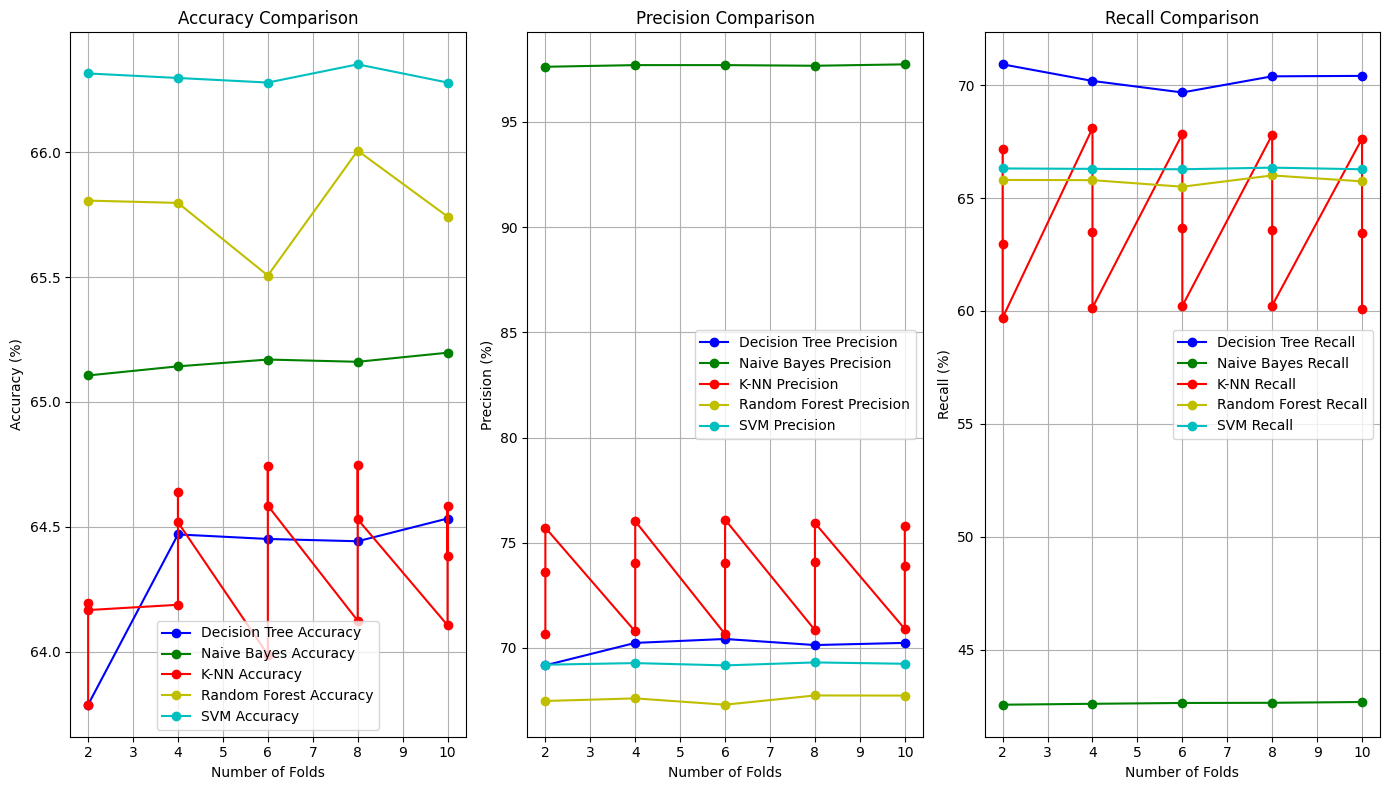

In [113]:
# Plotting perbandingan metrik (Accuracy, Precision, Recall) untuk setiap algoritma
plt.figure(figsize=(14, 8))

# Plotting untuk Accuracy
plt.subplot(131)
plt.plot(acc_dt['fold'], acc_dt['Decision Tree Accuracy'], marker='o', linestyle='-', color='b', label='Decision Tree Accuracy')
plt.plot(acc_nbc['fold'], acc_nbc['Naive Bayes Accuracy'], marker='o', linestyle='-', color='g', label='Naive Bayes Accuracy')
plt.plot(acc_knn['fold'], acc_knn['K-NN Accuracy'], marker='o', linestyle='-', color='r', label='K-NN Accuracy')
plt.plot(acc_rf['fold'], acc_rf['Random Forest Accuracy'], marker='o', linestyle='-', color='y', label='Random Forest Accuracy')
plt.plot(acc_svm['fold'], acc_svm['SVM Accuracy'], marker='o', linestyle='-', color='c', label='SVM Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Number of Folds')
plt.ylabel('Accuracy (%)')
plt.xticks(range(2, 11))
plt.legend(loc='best')
plt.grid(True)

# Plotting untuk Precision
plt.subplot(132)
plt.plot(acc_dt['fold'], acc_dt['Decision Tree Precision'], marker='o', linestyle='-', color='b', label='Decision Tree Precision')
plt.plot(acc_nbc['fold'], acc_nbc['Naive Bayes Precision'], marker='o', linestyle='-', color='g', label='Naive Bayes Precision')
plt.plot(acc_knn['fold'], acc_knn['K-NN Precision'], marker='o', linestyle='-', color='r', label='K-NN Precision')
plt.plot(acc_rf['fold'], acc_rf['Random Forest Precision'], marker='o', linestyle='-', color='y', label='Random Forest Precision')
plt.plot(acc_svm['fold'], acc_svm['SVM Precision'], marker='o', linestyle='-', color='c', label='SVM Precision')
plt.title('Precision Comparison')
plt.xlabel('Number of Folds')
plt.ylabel('Precision (%)')
plt.xticks(range(2, 11))
plt.legend(loc='best')
plt.grid(True)

# Plotting untuk Recall
plt.subplot(133)
plt.plot(acc_dt['fold'], acc_dt['Decision Tree Recall'], marker='o', linestyle='-', color='b', label='Decision Tree Recall')
plt.plot(acc_nbc['fold'], acc_nbc['Naive Bayes Recall'], marker='o', linestyle='-', color='g', label='Naive Bayes Recall')
plt.plot(acc_knn['fold'], acc_knn['K-NN Recall'], marker='o', linestyle='-', color='r', label='K-NN Recall')
plt.plot(acc_rf['fold'], acc_rf['Random Forest Recall'], marker='o', linestyle='-', color='y', label='Random Forest Recall')
plt.plot(acc_svm['fold'], acc_svm['SVM Recall'], marker='o', linestyle='-', color='c', label='SVM Recall')
plt.title('Recall Comparison')
plt.xlabel('Number of Folds')
plt.ylabel('Recall (%)')
plt.xticks(range(2, 11))
plt.legend(loc='best')
plt.grid(True)

# Menampilkan grafik
plt.tight_layout()
plt.show()